In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print('\nColumns with missing value:')
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [ ]:
netflix_df.isnull().sum().sum()

4307

In [ ]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [ ]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

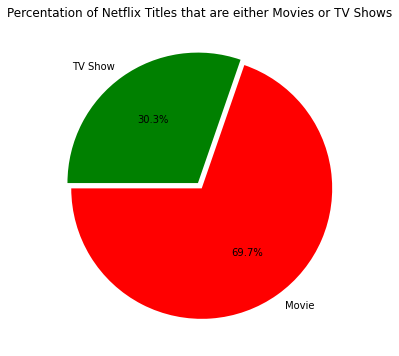

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index,colors=['red','green'],autopct='%1.1f%%', startangle=180)

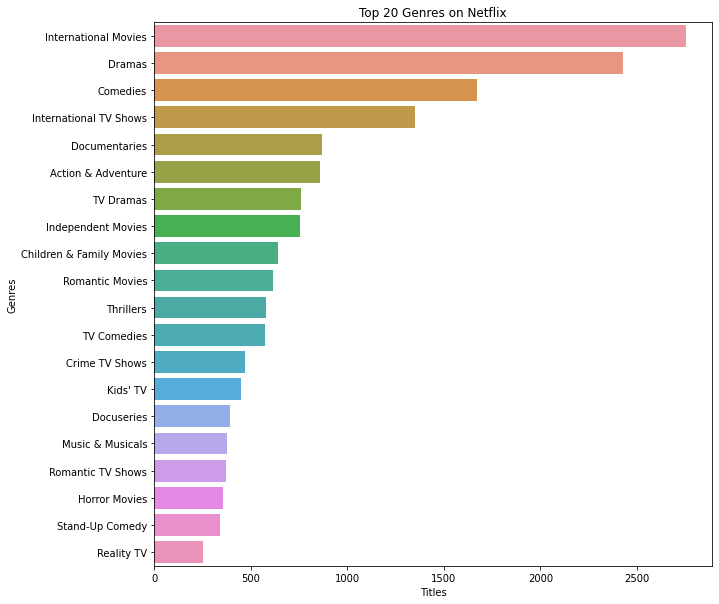

In [ ]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

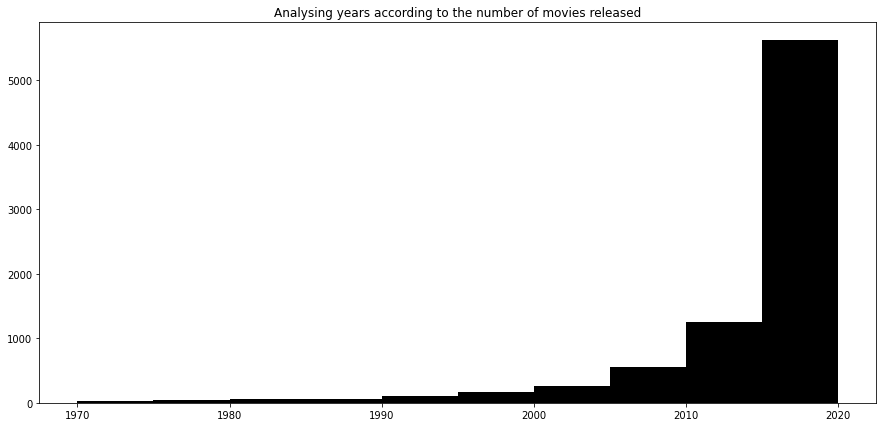

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Analysing years according to the number of movies released")
plt.hist(netflix_df.release_year,bins=np.arange(1970,2021,5) ,color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


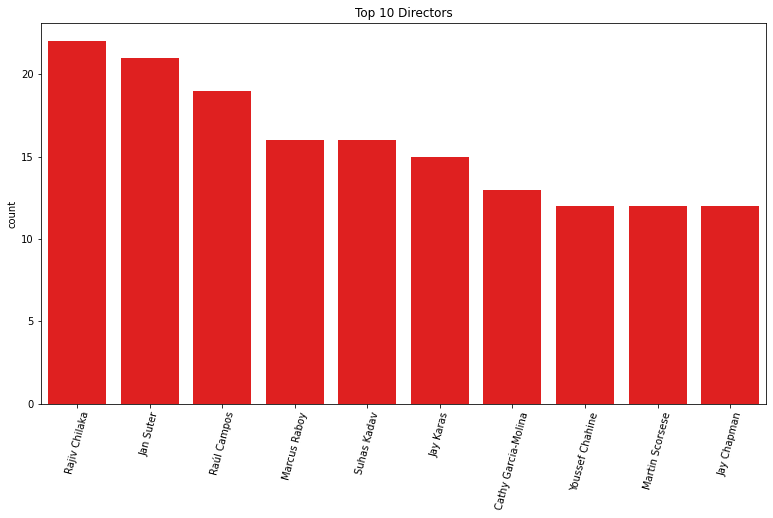

In [ ]:
top_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.xticks(rotation=75)
plt.title('Top 10 Directors')
sns.countplot(top_directors, order=top_directors.value_counts().index[:10], color="red")
plt.show()

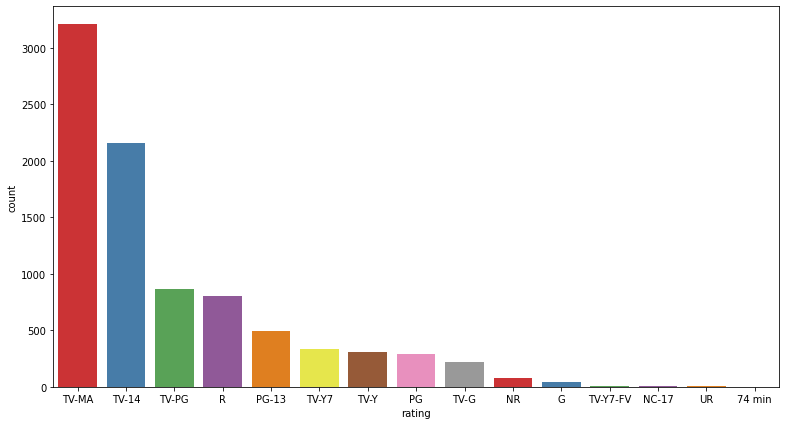

In [ ]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x="rating", data=netflix_df, palette="Set1", order=netflix_df['rating'].value_counts().index[0:15])

In [ ]:
netflix_movies_df=netflix_df[netflix_df.type=='Movie']
netflix_shows_df=netflix_df[netflix_df.type=='TV Show']

In [ ]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix_df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
features=['title','duration']
durations= netflix_shows_df[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

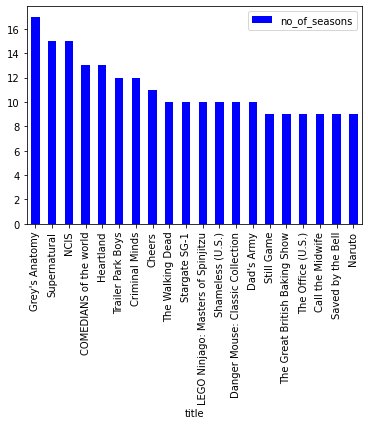

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue');

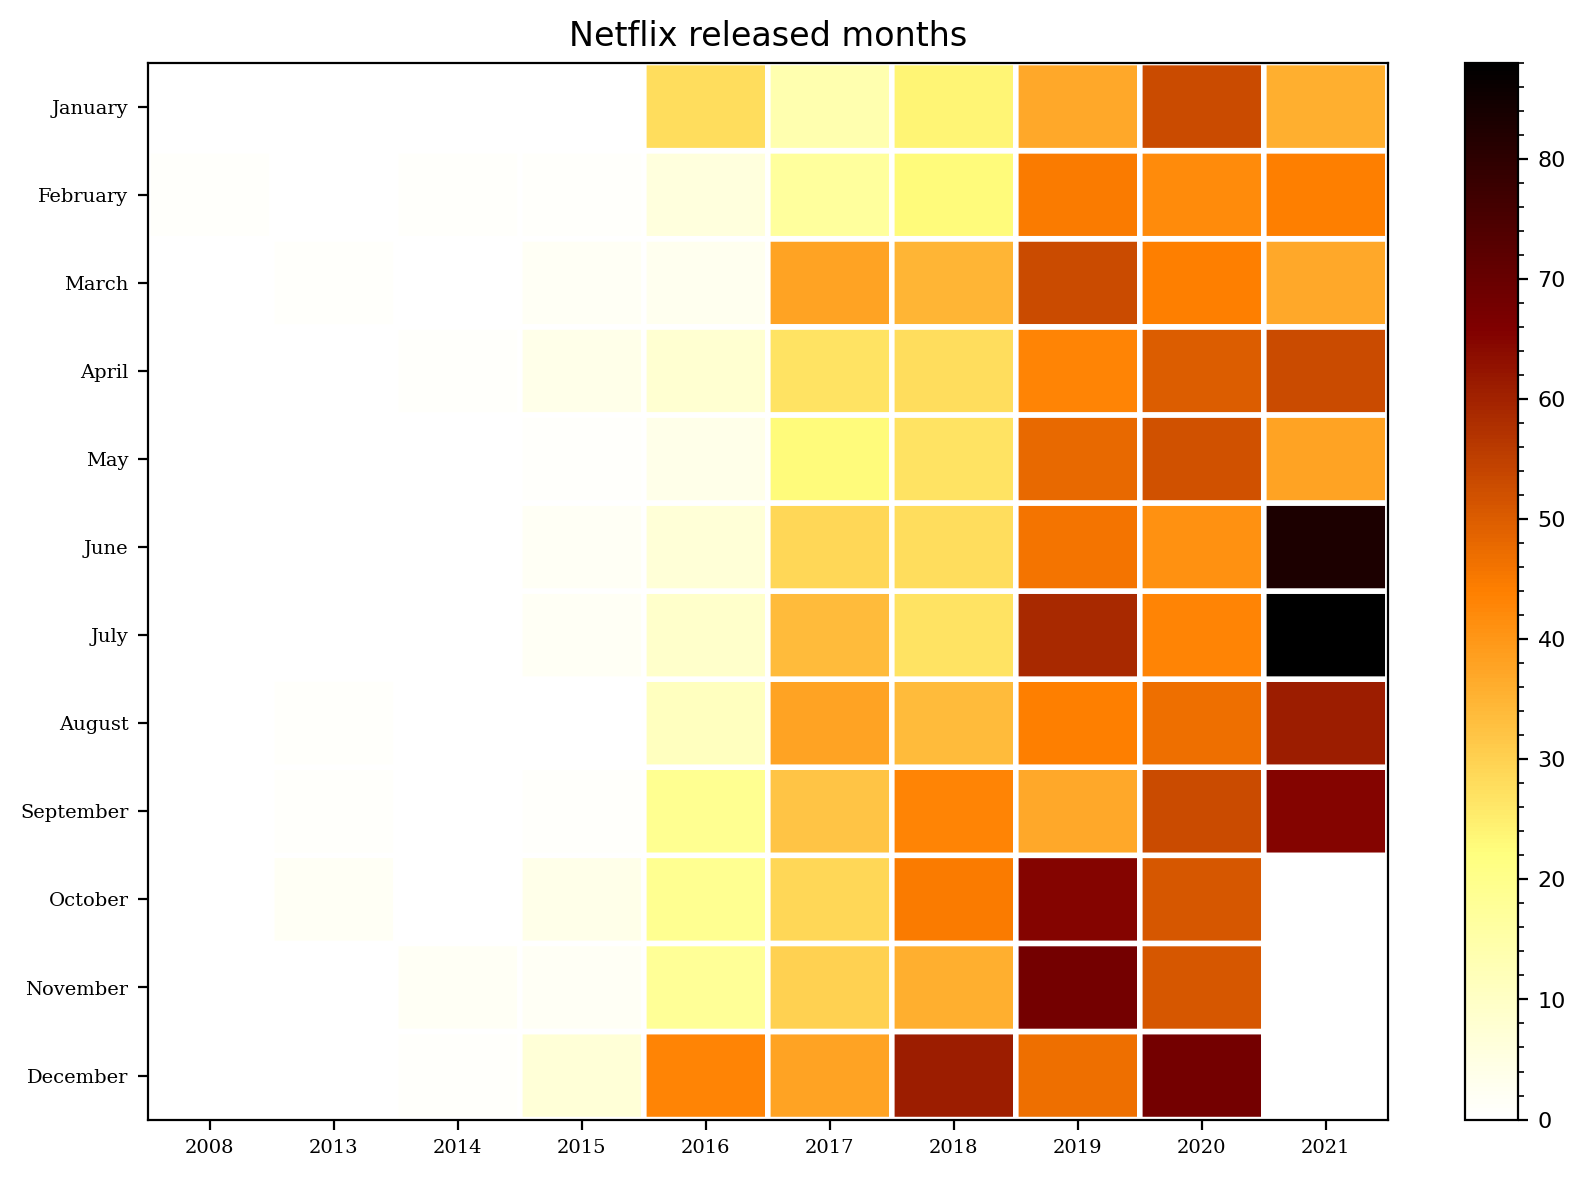

In [ ]:
netflix_date = netflix_shows_df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix released months')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [ ]:
newest=netflix_movies_df.sort_values(by='release_year', ascending=False)[0:10]
newest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1108,s1109,Movie,Irul,Naseef Yusuf Izuddin,"Fahadh Faasil, Soubin Shahir, Darshana Rajendran",India,"April 2, 2021",2021,TV-MA,91 min,"International Movies, Thrillers",When a car breakdown forces a couple to seek s...
882,s883,Movie,Jungle Beat: The Movie,Brent Dawes,"Ed Kear, David Menkin, Ina Marie Smith, John G...",Mauritius,"May 14, 2021",2021,TV-Y7,90 min,"Children & Family Movies, Comedies",When a lost and lonely alien crash-lands on Ea...
871,s872,Movie,Sardar Ka Grandson,Kaashvie Nair,"Arjun Kapoor, Neena Gupta, Rakul Preet Singh, ...",India,"May 18, 2021",2021,TV-14,140 min,"Comedies, Dramas, International Movies",A devoted grandson’s mission to reunite his ai...
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
873,s874,Movie,Ahaan,Nikhil Pherwani,"Arif Zakaria, Abuli Mamaji, Niharika Singh, Ra...",India,"May 15, 2021",2021,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Jilted by his wife, a man with OCD finds eye-o..."
1466,s1467,Movie,The Minimalists: Less Is Now,No Director,No Cast,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...
877,s878,Movie,Cinema Bandi,Praveen Kandregula,"Vikas Vasistha, Sandeep Varanasi, Rag Mayur, T...",India,"May 14, 2021",2021,TV-MA,99 min,"Comedies, Independent Movies, International Mo...",A struggling rickshaw driver’s life takes a ro...
878,s879,Movie,Ferry,Cecilia Verheyden,"Frank Lammers, Elise Schaap, Huub Stapel, Moni...","Belgium, Netherlands","May 14, 2021",2021,TV-MA,107 min,"Dramas, International Movies, Thrillers","Before he built a drug empire, Ferry Bouman re..."
881,s882,Movie,I Am All Girls,Donovan Marsh,"Erica Wessels, Hlubi Mboya, Deon Lotz, Brendon...",South Africa,"May 14, 2021",2021,TV-MA,107 min,"Dramas, International Movies, Thrillers",A relentless detective finds common ground wit...
888,s889,Movie,The Upshaws - The Afterparty,No Director,"David Spade, London Hughes, Fortune Feimster, ...",Country Unavailable,"May 14, 2021",2021,TV-14,32 min,Comedies,"The comedic dream team from ""The Upshaws"" disc..."
